# Proyecto de Data Cleaning / Limpieza de Datos - Estudio de Discapacidad 2018
Por **Daniel Palacio** (github.com/palaciodaniel) - Diciembre de 2020

- - -

## 1. Carga de Dataset y Librerías Requeridas

In [1]:
import pandas as pd
import missingno as msno

df = pd.read_csv("base_estudio_discapacidad_2018.csv", sep = ";", na_values= " ")

Este dataset fue obtenido del sitio oficial del [INDEC](https://www.indec.gob.ar/), el *Instituto Nacional de Estadística y Censos* de Argentina.

La sección específica del estudio puede consultarse en el [siguiente enlace](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos-7).

Los materiales utilizados pueden visualizarse/descargarse de estos respectivos enlaces:

- [Base de Datos (formato CSV)](https://www.indec.gob.ar/ftp/cuadros/menusuperior/enpd/base_estudio_discapacidad_2018.zip) 
- [Manual de Uso (formato PDF)](https://www.indec.gob.ar/ftp/cuadros/menusuperior/enpd/estudio_discapacidad_manual_base_datos_usuario.pdf)

Aunque no es absolutamente imprescindible, **se recomienda abrir el Manual de Uso en la página 9 y tenerlo presente antes de continuar con el resto de esta Notebook**.

- - -

## 2. Análisis Exploratorio de Datos

El atributo _shape_ se interpreta como (número de casos/observaciones, número de columnas/especificaciones).

In [2]:
df.shape

(82327, 35)

Dado que son 35 columnas, si queremos visualizar sus valores no entrarían en la pantalla por ser demasiadas, por lo que vamos a dividir este proceso en un par de celdas así se posibilita una fácil primera lectura de los datos.

":15" hace referencia a que nos limitaremos a los 15 primeros casos. ":11" indica que visualizaremos en este primer bloque las primeras 10 columnas (la 11 no se cuenta).

Si en el contenido de una columna apareciera el valor "NaN", esto significa que está vacía.

In [3]:
df.iloc[:15, :11]

,ID,pondera,personas_hogar,hogar_dificultad,personas_dificultad_hogar,tipo_hogar,pa01,pa03,pa04,edad_grandes_grupos,edad_agrupada
0,1,413,4,0,NaN,2,1,1,1,2,3
1,2,473,5,0,NaN,2,3,3,1,2,3
2,3,473,5,0,NaN,2,4,3,1,2,3
3,4,473,5,0,NaN,2,5,3,1,1,2
4,5,409,3,1,1.0,3,1,1,2,2,4
5,6,409,3,1,1.0,3,2,5,2,3,5
6,7,409,3,1,1.0,3,3,6,2,2,3
7,8,394,2,0,NaN,2,1,1,1,3,5
8,9,394,2,0,NaN,2,2,2,2,3,5
9,10,560,3,0,NaN,2,1,1,1,2,4


En esta segunda parte visualizaremos desde las columnas 11 hasta la 22.

Téngase en cuenta que no existe una columna llamada "imputadoA", no se está omitiendo ninguna.

In [4]:
df.iloc[:15, 11:23]

,imputadoB,imputadoC,imputadoD,dificultad_6ymas,dificultad_total,dificultades,tipo_dificultad,certificado,PC01,edad_inicio,pc03,pc04
0,0,0,0,0.0,0,NaN,NaN,2,NaN,NaN,NaN,NaN
1,1,0,0,0.0,0,NaN,NaN,2,NaN,NaN,NaN,NaN
2,1,0,0,0.0,0,NaN,NaN,2,NaN,NaN,NaN,NaN
3,1,0,0,0.0,0,NaN,NaN,2,NaN,NaN,NaN,NaN
4,0,0,0,0.0,0,NaN,NaN,2,NaN,NaN,NaN,NaN
5,0,0,0,1.0,1,1.0,1.0,2,2.0,3.0,4.0,1.0
6,0,0,0,0.0,0,NaN,NaN,2,NaN,NaN,NaN,NaN
7,0,0,0,0.0,0,NaN,NaN,2,NaN,NaN,NaN,NaN
8,0,0,0,0.0,0,NaN,NaN,2,NaN,NaN,NaN,NaN
9,0,0,0,0.0,0,NaN,NaN,2,NaN,NaN,NaN,NaN


In [5]:
df.iloc[:15, 23:]

,PC05,PC06,PC07,PC08,mod_edu,MNEA,PC19,PC20,PC21,PC26,Estado_ocup,cat_ocup
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,1.0,7.0,3.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualicemos la lista total de columnas, el número de observaciones completadas en cada una, y el tipo de información que contienen. "int64" indica números enteros, mientras que "float64" indica números con decimales (aunque a efectos prácticos, en todo este dataset sus valores pueden considerarse enteros).

Esto termina de confirmar que se usaron códigos numéricos para todas las columnas, por lo que vamos a irlos reemplazando manualmente con las categorías presentes en el Manual de Uso.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82327 entries, 0 to 82326
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         82327 non-null  int64  
 1   pondera                    82327 non-null  int64  
 2   personas_hogar             82327 non-null  int64  
 3   hogar_dificultad           82327 non-null  int64  
 4   personas_dificultad_hogar  21820 non-null  float64
 5   tipo_hogar                 82327 non-null  int64  
 6   pa01                       82327 non-null  int64  
 7   pa03                       82327 non-null  int64  
 8   pa04                       82327 non-null  int64  
 9   edad_grandes_grupos        82327 non-null  int64  
 10  edad_agrupada              82327 non-null  int64  
 11  imputadoB                  82327 non-null  int64  
 12  imputadoC                  82327 non-null  int64  
 13  imputadoD                  82327 non-null  int

También, si fuera necesario, se eliminarán columnas redundantes y se cambiarán los nombres de ciertas columnas para que sean más informativas.

Para finalizar con esta sección, visualicemos por cada columna cuántas observaciones no están vacías. Es importante aclarar que el rellenado de las mismas está más allá de los objetivos de esta Notebook, pero si pudiéramos combinar columnas en una sola y con esto consiguiéramos sacarnos de encima columnas muy vacías, esto por supuesto será considerado como un logro adicional.

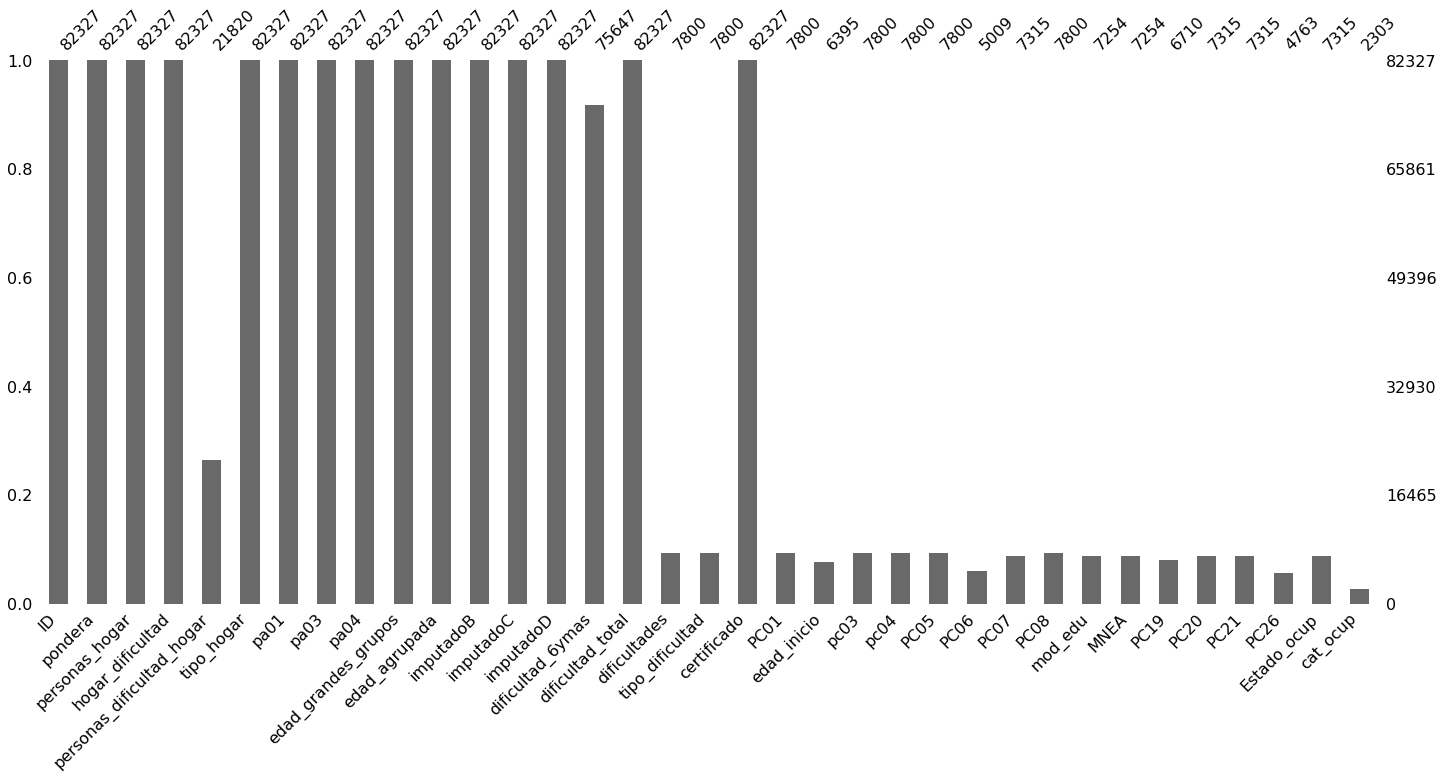

In [7]:
msno.bar(df)

- - -

## 3. Data Cleaning / Limpieza de Datos

### I. "ID"

Para comenzar, centrémosnos en la columna "ID". ¿Cada valor es único y se corresponde con el número total de observaciones?

In [8]:
df["ID"].nunique()

82327

Dado que el conteo de valores fue exactamente igual al número de observaciones (82327), entonces vamos a colocar la columna "ID" directamente como índice:

In [9]:
df.set_index("ID", inplace = True)
df.iloc[:15, :5]

,pondera,personas_hogar,hogar_dificultad,personas_dificultad_hogar,tipo_hogar
ID,,,,,
1,413,4,0,NaN,2
2,473,5,0,NaN,2
3,473,5,0,NaN,2
4,473,5,0,NaN,2
5,409,3,1,1.0,3
6,409,3,1,1.0,3
7,409,3,1,1.0,3
8,394,2,0,NaN,2
9,394,2,0,NaN,2


- - -

### II. "Pondera" & "personas_hogar"

No se manipularán los valores de las columna "Pondera" y "personas_hogar", pero sí vamos a cambiarles el nombre para que sea más claro de qué se tratan:

In [10]:
df.rename(columns = {"pondera": "ponderador",
                     "personas_hogar": "nro_personas_hogar"}, inplace = True)

- - -

### III. "hogar_dificultad" & "personas_dificultad_hogar"

Examinemos las columnas "hogar_dificultad" y "personas_dificultad_hogar". La primera hace referencia a si en dicho hogar hay al menos un miembro con discapacidad (0 = No, 1 = Sí), y en ella vemos que figuran 21820 casos confirmados. 

"personas_dificultad_hogar" indica la cantidad de personas discapacitadas en el hogar. Sumar las tres categorías de valores nos da también 21820, un número que ya aparecía en el gráfico de Missingno.

In [11]:
print(df["hogar_dificultad"].value_counts(), "\n")
print(df["personas_dificultad_hogar"].value_counts())
print("Total:", df["personas_dificultad_hogar"].value_counts().sum())

0    60507
1    21820
Name: hogar_dificultad, dtype: int64 

1.0    17039
2.0     3916
3.0      865
Name: personas_dificultad_hogar, dtype: int64
Total: 21820


De este modo, confirmamos que los valores están alineados y podemos prescindir de "hogar_dificultad" por ser la menos específica de las columnas.

Es cierto que "personas_dificultad_hogar" tiene 60507 valores sin completar, pero simplemente podemos llenarlos indicando que los mismos corresponden a hogares sin personas discapacitadas.

Removamos, entonces, la columna "hogar_dificultad" y adaptemos "personas_dificultad_hogar" para que sea más clara. Primeramente, cambiaremos el nombre de la columna a "nro_discapacitados_en_hogar", y luego pasaremos a renombrar sus clasificaciones numéricas a las del Manual de Uso.

Podrían haberse dejado sus valores tal como están, ya que a fin de cuentas se trata de números enteros, pero desafortunadamente el valor 3 hace referencia a "tres o más discapacitados", por lo que debemos aclarar esto. Sin embargo, al agregarle otros caracteres la columna dejará de contener _integers_ (números enteros) y pasará a ser de tipo _string_ (texto); de todas formas, se optará por esta opción, ya que al volverse el valor 3 desconocido en cuanto al número real que representa (podrían haber tres, cuatro, cinco o más personas discapacitadas bajo esa categoría) ya no tiene sentido realizar operaciones matemáticas sobre esta columna.

In [12]:
df.drop("hogar_dificultad", axis = 1, inplace = True)

df.rename(columns = {"personas_dificultad_hogar": "nro_discapacitados_en_hogar"}, inplace = True)

df["nro_discapacitados_en_hogar"].fillna("Sin discapacitados", inplace = True)
df["nro_discapacitados_en_hogar"].replace({
    1: "Un discapacitado",
    2: "Dos discapacitados",
    3: "Tres o más discapacitados"}, inplace = True)

print(df["nro_discapacitados_en_hogar"].value_counts())
print("Total:", df["nro_discapacitados_en_hogar"].value_counts().sum())

Sin discapacitados           60507
Un discapacitado             17039
Dos discapacitados            3916
Tres o más discapacitados      865
Name: nro_discapacitados_en_hogar, dtype: int64
Total: 82327


- - -

### IV. "tipo_hogar"

"tipo_hogar" es una columna que especialmente necesita que sus cinco valores numéricos sean reemplazados por las categorías que cada uno representa. 

In [13]:
df["tipo_hogar"].replace({
    1: "Unipersonal",
    2: "Familiar - Nuclear",
    3: "Familiar - Extendido",
    4: "Familiar - Compuesto",
    5: "No Familiar - Jefes y otros familiares"
}, inplace = True)

print(df["tipo_hogar"].value_counts())

Familiar - Nuclear                        55050
Familiar - Extendido                      20717
Unipersonal                                5436
Familiar - Compuesto                        779
No Familiar - Jefes y otros familiares      345
Name: tipo_hogar, dtype: int64


- - -

### V. "pa03" & "pa04"

En cuanto a "pa03" y "pa04", además de sus clasificaciones, obviamente necesitan un nombre de columna mucho más informativo.

In [14]:
df.rename(columns = {"pa03": "relacion_parentesco",
                     "pa04": "sexo"}, inplace = True)

df["relacion_parentesco"].replace({
    1: "Jefe",
    2: "Pareja/cónyuge",
    3: "Hijo/hijastro",
    4: "Nieto",
    5: "Progenitor/suegro",
    6: "Otros (familiares/no familiares)"
}, inplace = True)

df["sexo"].replace({
    1: "Varón",
    2: "Mujer"
}, inplace = True)

print(df["relacion_parentesco"].value_counts(), "\n")
print(df["sexo"].value_counts())

Hijo/hijastro                       31790
Jefe                                27147
Pareja/cónyuge                      14938
Nieto                                3843
Otros (familiares/no familiares)     3447
Progenitor/suegro                    1162
Name: relacion_parentesco, dtype: int64 

Mujer    42905
Varón    39422
Name: sexo, dtype: int64


- - -

### VI. "pa01"

Para "pa01", el Manual de Uso la describe como _"N° de orden que se asigna a las personas que conforman
cada hogar de la vivienda"_. Vamos a darle entonces un nombre que refleje esto.

No hace falta alterar sus valores.

In [15]:
df.rename(columns = {"pa01": "nro_orden_residente"}, inplace = True)

- - -

### VII. "edad_grandes_grupos" & "edad_agrupada"

Veamos ahora qué pasa con las columnas "edad_grandes_grupos" y "edad_agrupada". Así clasifican los grupos cada una:

|"edad_grandes_grupos"|"edad_agrupada"|
|:---:|:---:|
|1 = 0 a 14|1 = 0 a 5 años|
| |2 = 6 a 13 años|
|2 = 15 a 64|3 = 14 a 39 años|
| |4 = 40 a 64 años|
|3 = 65 y más|5 = 65 años y más|

Una es más específica que la otra, por lo que en teoría podríamos deshacernos de la más general. ¿Sería esto prudente? Averigüemos.

In [16]:
print(df["edad_grandes_grupos"].value_counts())
print("Total:", df["edad_grandes_grupos"].value_counts().sum(), "\n")

print(df["edad_agrupada"].value_counts())
print("Total:", df["edad_agrupada"].value_counts().sum())

2    54381
1    17998
3     9948
Name: edad_grandes_grupos, dtype: int64
Total: 82327 

3    32870
4    22816
2    10013
5     9948
1     6680
Name: edad_agrupada, dtype: int64
Total: 82327


Si sumamos los grupos 1 (0-5 años) y 2 (6-13 años) de "edad_agrupada" nos da: 

In [17]:
6680 + 10013

16693

Para el grupo 1 (0-14 años) de "edad_grandes_grupos" el valor es de 17998. La diferencia es...

In [18]:
17998 - 16693

1305

Podríamos intuir que esta diferencia de 1305 corresponde a la edad de 14 años. Lo terminaremos de confirmar con las siguientes dos operaciones matemáticas: primero, si sumamos los grupos 3 (14-39 años) y 4 (40-64 años) de "edad_agrupada" obtenemos:

In [19]:
32870 + 22816

55686

Para el grupo 2 (15-64 años) de "edad_grandes_grupos" el valor es de 54381. Si la diferencia entre 55686 y 54381 es de 1305, podemos confirmar que efectivamente ese número corresponde a la edad de 14 años. ¿Es así?

In [20]:
55686 - 54381

1305

Quedó confirmado.

Finalmente, el grupo 3 (65+ años) de "edad_grandes_grupos" y el 5 (65+ años) de "edad_agrupada" comparten el mismo valor de 9948. Así corroboramos que podemos deshacernos de una de las columnas. Elegimos, entonces, la que menos información nos provee.

In [21]:
df.drop("edad_grandes_grupos", axis = 1, inplace = True)
df.iloc[:5, 6:9]

,sexo,edad_agrupada,imputadoB
ID,,,
1,Varón,3,0
2,Varón,3,1
3,Varón,3,1
4,Varón,2,1
5,Mujer,4,0


Además, vamos a renombrar ahora las categorías de edades, ya que con tantos números hay un riesgo importante de confusión.

Por otra parte, "rango_etario" es un nombre de columna más claro que "edad_agrupada".

In [22]:
df["edad_agrupada"] = df["edad_agrupada"].replace({
    1: "0-5 años",
    2: "6-13 años",
    3: "14-39 años",
    4: "40-64 años",
    5: "65+ años"
})

df.rename(columns = {"edad_agrupada": "rango_etario"}, inplace = True)

print(df["rango_etario"].value_counts())
print("Total:", df["rango_etario"].value_counts().sum())

14-39 años    32870
40-64 años    22816
6-13 años     10013
65+ años       9948
0-5 años       6680
Name: rango_etario, dtype: int64
Total: 82327


- - -

### VIII. "imputado[B-C-D]"

Ahora revisemos el grupo de columnas de "imputado":

In [23]:
print(df["imputadoB"].value_counts(), "\n")

print(df["imputadoC"].value_counts(), "\n")

print(df["imputadoD"].value_counts())

0    81690
1      637
Name: imputadoB, dtype: int64 

0    81878
1      449
Name: imputadoC, dtype: int64 

0    81620
1      707
Name: imputadoD, dtype: int64


Teniendo en cuenta que estas columnas describen los *casos a los que se les imputó el módulo (B/C/D)*, vamos a renombrarlas para que esto sea más explícito.

In [24]:
df.rename(columns = {"imputadoB": "modulob_imputado",
                     "imputadoC": "moduloc_imputado",
                     "imputadoD": "modulod_imputado"}, inplace = True)

Además, notemos que estas columnas, aunque formalmente figuren como "int64" (es decir, que contienen números enteros), en realidad son de tipo *booleanas*. Básicamente, esto quiere decir que son columnas binarias donde sus observaciones o son verdaderas o falsas:

0 = False / Falso

1 = True / Verdadero

Nosotros no vamos a forzar tal formato en estas tres columnas, por un problema que será explicado en la sección "Visualizando Dataset Optimizado", pero teniendo en cuenta este conocimiento sí vamos a reemplazar sus valores por "Sí" o por "No":

In [25]:
df["modulob_imputado"] = df["modulob_imputado"].replace({
    0: "No",
    1: "Sí"
})

df["moduloc_imputado"] = df["moduloc_imputado"].replace({
    0: "No",
    1: "Sí"
})

df["modulod_imputado"] = df["modulod_imputado"].replace({
    0: "No",
    1: "Sí"
})

Veamos cómo quedaron:

In [26]:
print(df["modulob_imputado"].value_counts(), "\n")

print(df["moduloc_imputado"].value_counts(), "\n")

print(df["modulod_imputado"].value_counts())

No    81690
Sí      637
Name: modulob_imputado, dtype: int64 

No    81878
Sí      449
Name: moduloc_imputado, dtype: int64 

No    81620
Sí      707
Name: modulod_imputado, dtype: int64


- - -

### IX. "dificultades" & "tipo_dificultad"

El siguiente es posiblemente el tramo más complejo: se trata de las columnas sobre "dificultades". Vamos a comenzar viendo específicamente las columnas "dificultades" y "tipo_dificultad". Estas son sus categorías, respectivamente:

| dificultades |
|:---:|
|1 = Una dificultad |
| 2 = Dos dificultades |
| 3 = Tres dificultades o más |
| 4 = Sólo certificado de discapacidad |

| tipo_dificultad |
|:---:|
| 1 = Sólo motora |
| 2 = Sólo visual |
| 3 = Sólo auditiva |
| 4 = Sólo mental-cognitiva |
| 5 = Sólo del cuidado de sí |
| 6 = Sólo del habla y la comunicación |
| 7 = Dos dificultades |
| 8 = Tres dificultades o más |
| 9 = Sólo certificado |

Como ambas columnas sólo tienen las referencias numéricas a las clasificaciones, tener en mente qué nos está indicando cada número puede hacerse tedioso, por lo cual antes de proseguir renombraremos los valores de las mismas.

Nótese que para "tipo_dificultad" los nombres de las clasificaciones serán ligeramente alterados, respecto de los originales del Manual de Uso, para que sean más entendibles. En el futuro repetiremos este proceso con otras columnas si fuera necesario.

In [27]:
df["dificultades"] = df["dificultades"].replace({
    1: "Una dificultad",
    2: "Dos dificultades",
    3: "Tres o más dificultades",
    4: "Sólo certificado de discapacidad"
})

df["tipo_dificultad"] = df["tipo_dificultad"].replace({
    1: "Una dificultad - Motora",
    2: "Una dificultad - Visual",
    3: "Una dificultad - Auditiva",
    4: "Una dificultad - Mental/cognitiva",
    5: "Una dificultad - Cuidado de sí",
    6: "Una dificultad - Habla y comunicación",
    7: "Dos dificultades",
    8: "Tres o más dificultades",
    9: "Sólo certificado de discapacidad"
})

Sabemos por Missingno que ambas columnas tienen 7800 observaciones -y podremos constatarlo de vuelta en el siguiente *.value_counts()*-, por lo que podemos hipotetizar que sumando las categorías 1 a 6 de "tipo_dificultad" nos daría la misma cantidad que "1 = Una dificultad" en la columna "dificultades". 

Si fuera así podríamos prescindir de "dificultades", ya que sus tres categorías siguientes ("Dos dificultades", "Tres dificultades" y "Sólo certificado de discapacidad") ya están contempladas en "tipo_dificultad".

Veamos qué pasa:

In [28]:
print(df["dificultades"].value_counts())
print("Total:", df["dificultades"].value_counts().sum(), "\n")

print(df["tipo_dificultad"].value_counts())
print("Total:", df["dificultades"].value_counts().sum())

Una dificultad                      4580
Dos dificultades                    1436
Tres o más dificultades              973
Sólo certificado de discapacidad     811
Name: dificultades, dtype: int64
Total: 7800 

Una dificultad - Motora                  2021
Dos dificultades                         1436
Una dificultad - Visual                  1071
Tres o más dificultades                   973
Sólo certificado de discapacidad          811
Una dificultad - Auditiva                 797
Una dificultad - Mental/cognitiva         581
Una dificultad - Habla y comunicación      71
Una dificultad - Cuidado de sí             39
Name: tipo_dificultad, dtype: int64
Total: 7800


Vemos que la primer categoría de "dificultades" ("Una dificultad") tiene 4580 observaciones. Por lo tanto, si sumamos las seis categorías de tipo "Una dificultad" de "tipo_dificultad" y nos da el mismo valor que el de la primer categoría de "dificultades", entonces podemos eliminar otra columna más.

Lo que sumamos en la siguiente operación sería, entonces:

"Motora"(2021) + "Visual"(1071) + "Auditiva"(797) + "Cognitiva"(581) + "Comunicación"(71) + "Cuidado de sí"(39)

In [29]:
2021 + 1071 + 797 + 581 + 39 + 71

4580

Queda entonces confirmado que otra columna más es redundante. Como siempre, elegimos la que menos información tiene; en este caso, "dificultades". 

In [30]:
df.drop("dificultades", axis = 1, inplace = True)
df.iloc[:5, 10:15]

,modulod_imputado,dificultad_6ymas,dificultad_total,tipo_dificultad,certificado
ID,,,,,
1,No,0.0,0,NaN,2
2,No,0.0,0,NaN,2
3,No,0.0,0,NaN,2
4,No,0.0,0,NaN,2
5,No,0.0,0,NaN,2


- - -

### X. "tipo_dificultad" & "dificultad_6ymas"

Para el siguiente paso, vamos a comparar "tipo_dificultad" con "dificultad_6ymas". Empecemos reemplazando las categorías de "dificultad6ymas": 

In [31]:
df["dificultad_6ymas"] = df["dificultad_6ymas"].replace({
    0: "6 años o más sin dificultad",
    1: "6 años o más con dificultad"
})

Por otra parte, y llegados a esta instancia, debemos agregar un dato **fundamental** de "tipo_dificultad": según el Manual de Uso, tal columna **sólo cubre los casos de SEIS años de edad o más CON dificultad**. 

De lo anterior se desprende que debería corresponderse, entonces, con el número de observaciones afirmativas de la columna "dificultad_6ymas". Confirmemos si esto es así.

In [32]:
print(df["tipo_dificultad"].value_counts())
print("Total:", df["tipo_dificultad"].value_counts().sum(), "\n")

print(df["dificultad_6ymas"].value_counts())

Una dificultad - Motora                  2021
Dos dificultades                         1436
Una dificultad - Visual                  1071
Tres o más dificultades                   973
Sólo certificado de discapacidad          811
Una dificultad - Auditiva                 797
Una dificultad - Mental/cognitiva         581
Una dificultad - Habla y comunicación      71
Una dificultad - Cuidado de sí             39
Name: tipo_dificultad, dtype: int64
Total: 7800 

6 años o más sin dificultad    67847
6 años o más con dificultad     7800
Name: dificultad_6ymas, dtype: int64


Esta vez no podemos simplemente eliminar "dificultad_6ymas", ya que vemos que tiene otras 67847 observaciones que "tipo_dificultad" no posee, que hacen referencia a gente mayor de 6 años sin dificultades. Tenemos entonces que pasar primero dichas observaciones a "tipo_dificultad" y recién ahí corresponderá deshacernos de "dificultad_6ymas". 

Si la operación fue exitosa, entonces en "tipo_dificultad" nos aparecerán 67847 observaciones con la clasificación "6 años o más sin dificultad" de "dificultad_6ymas". Veamos qué ocurre.

In [33]:
df["tipo_dificultad"].mask(df["tipo_dificultad"].isnull(), df["dificultad_6ymas"], inplace=True)

print(df["tipo_dificultad"].value_counts())
print("Total:", df["tipo_dificultad"].value_counts().sum())

6 años o más sin dificultad              67847
Una dificultad - Motora                   2021
Dos dificultades                          1436
Una dificultad - Visual                   1071
Tres o más dificultades                    973
Sólo certificado de discapacidad           811
Una dificultad - Auditiva                  797
Una dificultad - Mental/cognitiva          581
Una dificultad - Habla y comunicación       71
Una dificultad - Cuidado de sí              39
Name: tipo_dificultad, dtype: int64
Total: 75647


Vemos que ahora "tipo_dificultad" ya tiene 75647 observaciones, al igual que "dificultad_6ymas", por lo cual podemos borrar ésta última.

In [34]:
df.drop("dificultad_6ymas", axis = 1, inplace = True)
df.iloc[:5, 10:15]

,modulod_imputado,dificultad_total,tipo_dificultad,certificado,PC01
ID,,,,,
1,No,0,6 años o más sin dificultad,2,NaN
2,No,0,6 años o más sin dificultad,2,NaN
3,No,0,6 años o más sin dificultad,2,NaN
4,No,0,6 años o más sin dificultad,2,NaN
5,No,0,6 años o más sin dificultad,2,NaN


Antes de continuar, y para evitar posteriores confusiones, conviene cambiarle el nombre a "tipo_dificultad" para que refleje que sus clasificaciones fueron aplicadas a una población de 6 años o más. 

Además, como importamos la clasificación de "6 años o más sin dificultad", ahora el dato de "6 años o más" se volverá redundante, por lo que volveremos a renombrar esa categoría.

In [35]:
df.rename(columns = {"tipo_dificultad": "6+años_tipo_dificultad"}, inplace = True)

df["6+años_tipo_dificultad"] = df["6+años_tipo_dificultad"].replace({
    "6 años o más sin dificultad": "Sin dificultades"})

- - -

### XI. "6+años_tipo_dificultad" & "dificultad_total"

Estamos en el último paso de esta sub-sección de columnas referidas a _dificultades_.

Vemos que "6+años_tipo_dificultad" tiene 75647 observaciones; siendo que el dataset general incluye un total de 82327, entonces todavía nos están faltando completar...

In [36]:
82327 - 75647

6680

Las mismas las obtendremos de la columna "dificultad_total", la cual sí tiene los 82327 valores requeridos e incluye, por lo tanto, la población total. Recordando que "6+años_tipo_dificultad" sólo abarca la población a partir de los 6 años, entonces se deduce que estas observaciones faltantes corresponden a personas con y sin dificultades en el rango etario de 0 a 6 años.

Por supuesto, antes de transferir los datos, vamos a renombrar las dos categorías de "dificultad_total".

In [37]:
df["dificultad_total"] = df["dificultad_total"].replace(
    {0: "Menor de 6 años sin dificultad", 
     1: "Menor de 6 años con dificultad/es"})

df["dificultad_total"].value_counts()

Menor de 6 años sin dificultad       74383
Menor de 6 años con dificultad/es     7944
Name: dificultad_total, dtype: int64

Nótese que esta operación reemplazó **todos** los valores de la columna con esas dos definiciones. Esto es, por supuesto, absolutamente erróneo; pero dado que esta columna va a desaparecer, y sólo serán transferidas las observaciones que se correspondan con los 6680 campos faltantes en "tipo_dificultad", entonces no será un problema en absoluto. Al contrario, la operación incluso aportará información adicional que no figura en el dataset: nos permitirá saber cuántas personas menores de 6 años son sanas y cuántas tienen dificultades.

In [38]:
df["6+años_tipo_dificultad"].mask(df["6+años_tipo_dificultad"].isnull(), df["dificultad_total"], inplace=True)

print(df["6+años_tipo_dificultad"].value_counts())
print("Total:", df["6+años_tipo_dificultad"].value_counts().sum())

Sin dificultades                         67847
Menor de 6 años sin dificultad            6536
Una dificultad - Motora                   2021
Dos dificultades                          1436
Una dificultad - Visual                   1071
Tres o más dificultades                    973
Sólo certificado de discapacidad           811
Una dificultad - Auditiva                  797
Una dificultad - Mental/cognitiva          581
Menor de 6 años con dificultad/es          144
Una dificultad - Habla y comunicación       71
Una dificultad - Cuidado de sí              39
Name: 6+años_tipo_dificultad, dtype: int64
Total: 82327


Gracias a la operación ahora sabemos que hay 6536 menores de 6 años sin dificultad, y 144 con dificultades. Obviamente, no podremos ahondar más porque el dataset no profundizó en esta subpoblación menor de 6 años, pero el hecho de que ahora sepamos esto, y sin siquiera haber tenido la intención, es por demás interesante.

Naturalmente, el grupo de los 6536 menores de 6 años sin dificultad es redundante; no nos aporta nada esa división entre las personas sanas, por lo que añadiremos esas observaciones a la clasificación más general de "Sin dificultades". Si la operación salió bien, el grupo de "Sin dificultad" debería darnos un total general de:

In [39]:
67847 + 6536

74383

In [40]:
df["6+años_tipo_dificultad"] = df["6+años_tipo_dificultad"].replace(
    {"Menor de 6 años sin dificultad": "Sin dificultades"})

df["6+años_tipo_dificultad"].value_counts()

Sin dificultades                         74383
Una dificultad - Motora                   2021
Dos dificultades                          1436
Una dificultad - Visual                   1071
Tres o más dificultades                    973
Sólo certificado de discapacidad           811
Una dificultad - Auditiva                  797
Una dificultad - Mental/cognitiva          581
Menor de 6 años con dificultad/es          144
Una dificultad - Habla y comunicación       71
Una dificultad - Cuidado de sí              39
Name: 6+años_tipo_dificultad, dtype: int64

Ambas categorías fueron exitosamente sumadas.

Hecho todo esto, ahora "6+años_tipo_dificultad" no sólo engloba la información de todas las columnas de dificultad previas, sino que ya tiene completas sus 82327 observaciones. Por lo tanto, borremos "dificultad_total" y demos por finalizada esta complicada sub-sección.

In [41]:
df.drop("dificultad_total", axis = 1, inplace = True)
df.iloc[:5, 10:15]

,modulod_imputado,6+años_tipo_dificultad,certificado,PC01,edad_inicio
ID,,,,,
1,No,Sin dificultades,2,NaN,NaN
2,No,Sin dificultades,2,NaN,NaN
3,No,Sin dificultades,2,NaN,NaN
4,No,Sin dificultades,2,NaN,NaN
5,No,Sin dificultades,2,NaN,NaN


- - -

### Gráfico de Progreso I

Veamos un pantallazo general de cómo se vienen implementando todos estos cambios en el dataset:

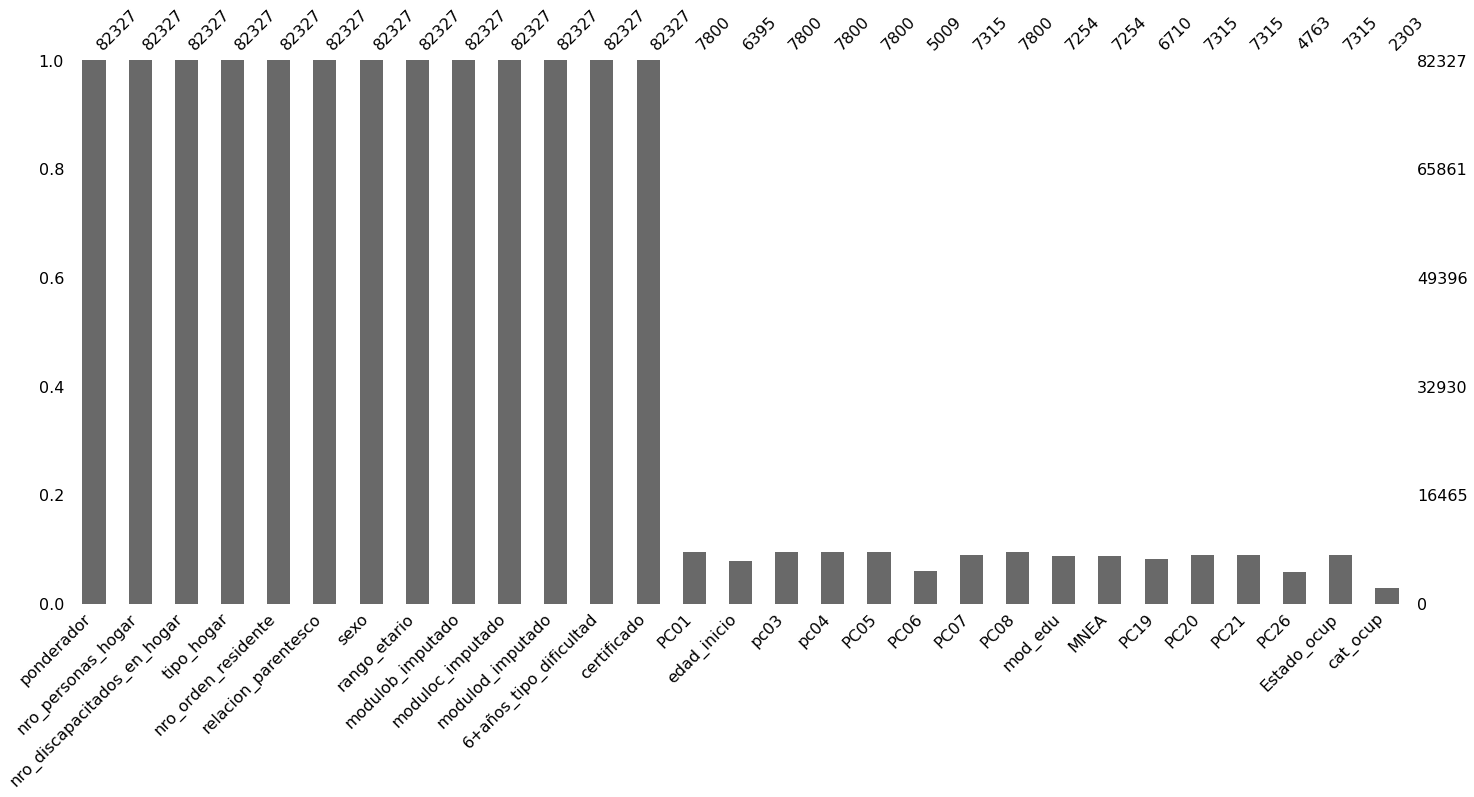

In [42]:
msno.bar(df)

- - -

### XII. "certificado"

Afortunadamente, la columna "certificado" nos permitirá un respiro, y sólo hay que hacer cambio de nombre y completar las clasificaciones:

In [43]:
df.rename(columns = {"certificado": "tenencia_certificado_discapacidad"}, inplace = True)

df["tenencia_certificado_discapacidad"] = df["tenencia_certificado_discapacidad"].replace(
    {1: "Sí - Vigente", 
     2: "No",
     9: "Ignorado"})

df["tenencia_certificado_discapacidad"].value_counts()

No              79526
Sí - Vigente     2738
Ignorado           63
Name: tenencia_certificado_discapacidad, dtype: int64

La columna quedó así lista. Sin embargo, puede notarse que desafortunadamente la categoría "No" es muy inespecífica: dado que las 82327 observaciones están completas, esto quiere decir que los "No" también están abarcando a gente sin dificultades, y salvo que se tratara de un caso de corrupción (es decir, tener dicho certificado siendo una persona sana), entonces sería deseable poder incorporar una nueva categoría "No aplica - Persona sana", para así poder determinar los casos de personas con dificultades que no tienen certificado.

¿Cómo podríamos obtener esta cifra? Tomando la cantidad de observaciones "No" de "tenencia_certificado_discapacidad" y restándole las de personas sanas (la cual ya determinamos en la columna "6+años_tipo_dificultad", que nos dio un valor de 74383. 

In [44]:
79526 - 74383

5143

Probemos si tiene sentido este valor. Si le sumamos las categorías de "Sí - Vigente" e "Ignorado" de la columna "tenencia_certificado_discapacidad", nos da el siguiente valor:

In [45]:
5143 + 2738 + 63

7944

Ahora bien, volvamos a la columna "6+años_tipo_dificultad", cuyos valores eran los siguientes:

In [46]:
df["6+años_tipo_dificultad"].value_counts()

Sin dificultades                         74383
Una dificultad - Motora                   2021
Dos dificultades                          1436
Una dificultad - Visual                   1071
Tres o más dificultades                    973
Sólo certificado de discapacidad           811
Una dificultad - Auditiva                  797
Una dificultad - Mental/cognitiva          581
Menor de 6 años con dificultad/es          144
Una dificultad - Habla y comunicación       71
Una dificultad - Cuidado de sí              39
Name: 6+años_tipo_dificultad, dtype: int64

Si sumamos todas las categorías nos dará, obviamente, el número de observaciones totales (82327), pero si le restamos las observaciones de personas sanas obtenemos un total de:

In [47]:
df["6+años_tipo_dificultad"].value_counts().sum() - 74383

7944

Vemos así que hay coincidencia, por lo cual podríamos generar esta categoría adicional. Ejecutemos los comandos correspondientes y veamos cuál es el resultado:

In [48]:
df["tenencia_cert_especifico"] = \
df["tenencia_certificado_discapacidad"].mask(df["tenencia_certificado_discapacidad"] == "No", \
                                         df["6+años_tipo_dificultad"])

df["tenencia_cert_especifico"] = df["tenencia_cert_especifico"].replace(
    {"Sin dificultades": "No aplica", 
     "Una dificultad - Motora": "No",
     "Dos dificultades": "No",
     "Una dificultad - Visual": "No",
     "Una dificultad - Auditiva": "No",
     "Tres o más dificultades": "No",
     "Una dificultad - Mental/cognitiva": "No",
     "Menor de 6 años con dificultad/es": "No",
     "Una dificultad - Habla y comunicación": "No",
     "Una dificultad - Cuidado de sí": "No"})

df["tenencia_cert_especifico"].value_counts()

No aplica       74351
No               5175
Sí - Vigente     2738
Ignorado           63
Name: tenencia_cert_especifico, dtype: int64

Vemos que hubo una discrepancia: obtuvimos 5175 "No" en vez de los 5143 esperados. Se trata de una diferencia de:

In [49]:
5175 - 5143

32

Hay 32 observaciones problemáticas, que no nos están permitiendo llegar al resultado esperado, a pesar de que cuidadosamente trazamos un razonamiento que es correcto. ¿Hay un error en el dataset?

Tras un par de horas de pruebas, vemos cuál es el problema: hay observaciones donde las personas no tienen dificultades, pero sin embargo en la columna "tenencia_certificado_discapacidad" figura como "Ignorado":

In [50]:
mask = (df["tenencia_certificado_discapacidad"] == "Ignorado") & \
       (df["6+años_tipo_dificultad"] == "Sin dificultades")

df[mask].iloc[:, 11:13]

,6+años_tipo_dificultad,tenencia_certificado_discapacidad
ID,,
18678,Sin dificultades,Ignorado
18994,Sin dificultades,Ignorado
21816,Sin dificultades,Ignorado
26059,Sin dificultades,Ignorado
27912,Sin dificultades,Ignorado
31591,Sin dificultades,Ignorado
31592,Sin dificultades,Ignorado
34513,Sin dificultades,Ignorado
39154,Sin dificultades,Ignorado


Por lo tanto, no resulta seguro computar esta cuarta categoría de "No aplica - Persona sana". Estos cálculos fueron hechos en una columna copia de "tenencia_certificado_discapacidad", por lo que será borrada y se conservará la original. Sin embargo, se consideró interesante resaltar esta discrepancia, que sin duda requirió un análisis minucioso para ser encontrada, por lo que se la explicó en detalle en caso de que se quiera indagar más.

In [51]:
df.drop("tenencia_cert_especifico", axis = 1, inplace = True)

df["tenencia_certificado_discapacidad"].value_counts() # Columna original

No              79526
Sí - Vigente     2738
Ignorado           63
Name: tenencia_certificado_discapacidad, dtype: int64

Si por alguna razón se quisiera conservar esta columna alternativa de "tenencia_certificado_discapacidad", simplemente agréguese un signo "#" al inicio de la primer línea de código anterior, de modo que quede así...

    #df.drop("tenencia_cert_especifico", axis = 1, inplace = True) 

...y a continuación ejecútese esta Notebook desde el principio yendo a **Kernel > Restart and Run All**. 

Esto mantendrá dicha columna en el dataset final.

- - -

### XIII. "PC01" & "edad_inicio"

Veamos el caso de las columnas "PC01" ("Comienzo de la dificultad") y "edad_inicio" ("Edad de Inicio de la Dificultad"). Renombrémoslas y detallemos sus clasificaciones, como siempre, para que sea más fácil interpretar la información.

Nótese que estas columnas, al igual que la gran mayoría de las siguientes, ya sólo contemplan una subpoblación de 6 años o mayores.

In [52]:
df.rename(columns = {"PC01": "6+años_comienzo_de_dificultad",
                     "edad_inicio": "6+años_edad_inicio_dificultad"}, inplace = True)

df["6+años_comienzo_de_dificultad"] = df["6+años_comienzo_de_dificultad"].replace(
    {1: "Desde el nacimiento", 
     2: "Después del nacimiento",
     9: "Ignorado"})

df["6+años_edad_inicio_dificultad"] = df["6+años_edad_inicio_dificultad"].replace(
    {0: "Menos de un año", 
     1: "1-14 años",
     2: "15-39 años",
     3: "40-64 años",
     4: "65+ años",
     999: "Ignorado"})

print(df["6+años_comienzo_de_dificultad"].value_counts())
print("Total:", df["6+años_comienzo_de_dificultad"].value_counts().sum(), "\n")

print(df["6+años_edad_inicio_dificultad"].value_counts())
print("Total:", df["6+años_edad_inicio_dificultad"].value_counts().sum())

Después del nacimiento    6395
Desde el nacimiento       1298
Ignorado                   107
Name: 6+años_comienzo_de_dificultad, dtype: int64
Total: 7800 

40-64 años         3420
15-39 años         1427
1-14 años           906
65+ años            340
Ignorado            208
Menos de un año      94
Name: 6+años_edad_inicio_dificultad, dtype: int64
Total: 6395


Podemos notar que ambas columnas pueden ser combinadas en una sola, ya que la categoría "Después del nacimiento" engloba la totalidad de las observaciones de la columna "6+años_edad_inicio_dificultad" (ambas hacen referencia a 6395 observaciones).

Sin embargo, debemos notar que si no tenemos cuidado combinaremos accidentalmente las clasificaciones "Ignorado" de ambas columnas. La diferencia del "Ignorado" de "6+años_edad_inicio_dificultad" es que, recordemos, estaría incluido dentro de los ignorados **después del nacimiento**.

In [53]:
df["6+años_edad_inicio_dificultad"] = df["6+años_edad_inicio_dificultad"].replace(
    {"Ignorado": "Después del nacimiento - Sin especificar"})

Y ahora sí, procedamos al reemplazo de las observaciones "Después del nacimiento" en "6+años_comienzo_de_dificultad". Veamos cómo quedó organizada esta columna.

In [54]:
df["6+años_comienzo_de_dificultad"].mask(df["6+años_comienzo_de_dificultad"] == "Después del nacimiento", \
                                         df["6+años_edad_inicio_dificultad"], inplace=True)

print(df["6+años_comienzo_de_dificultad"].value_counts())
print("Total:", df["6+años_comienzo_de_dificultad"].value_counts().sum())

40-64 años                                  3420
15-39 años                                  1427
Desde el nacimiento                         1298
1-14 años                                    906
65+ años                                     340
Después del nacimiento - Sin especificar     208
Ignorado                                     107
Menos de un año                               94
Name: 6+años_comienzo_de_dificultad, dtype: int64
Total: 7800


VIendo que está todo en orden, procedamos a borrar "6+años_edad_inicio_dificultad".

In [55]:
df.drop("6+años_edad_inicio_dificultad", axis = 1, inplace = True)

- - -

### XIV. "PC03"

La siguiente columna, "pc03", se refiere a las causas de la discapacidad. Vamos a completar sus categorías, según el Manual de Uso, y a cambiar su nombre a uno definitivamente más intuitivo. También dejaremos en claro que sólo cubre una subpoblación de 6 años o más:

In [56]:
df.rename(columns = {"pc03": "6+años_causas_discapacidad"}, inplace = True)

df["6+años_causas_discapacidad"] = df["6+años_causas_discapacidad"].replace(
    {1: "Accidente (tránsito, doméstico, laboral, deportivo, etc.)", 
     2: "Problemas en el parto / enfermedad materna durante embarazo",
     3: "Problemas asociados a la vejez",
     4: "Enfermedad/síndrome",
     5: "Otra causa sin especificar",
     9: "Ignorado"})

df["6+años_causas_discapacidad"].value_counts()

Enfermedad/síndrome                                            3583
Accidente (tránsito, doméstico, laboral, deportivo, etc.)      1337
Problemas asociados a la vejez                                 1030
Otra causa sin especificar                                     1006
Problemas en el parto / enfermedad materna durante embarazo     506
Ignorado                                                        338
Name: 6+años_causas_discapacidad, dtype: int64

- - -

### XV. "PC04"

Exactamente el mismo tratamiento recibirá "pc04", referida a la cobertura de salud. También se trata de una subpoblación de 6 años o más con discapacidad.

In [57]:
df.rename(columns = {"pc04": "6+años_cobertura_salud"}, inplace = True)

df["6+años_cobertura_salud"] = df["6+años_cobertura_salud"].replace(
    {1: "Obra social / PAMI", 
     2: "Prepaga por obra social o sólo por contratación voluntaria",
     3: "Programas o planes estatales de salud",
     4: "No tiene obra social, prepaga o plan estatal"})

df["6+años_cobertura_salud"].value_counts()

Obra social / PAMI                                            4646
No tiene obra social, prepaga o plan estatal                  1634
Programas o planes estatales de salud                          850
Prepaga por obra social o sólo por contratación voluntaria     670
Name: 6+años_cobertura_salud, dtype: int64

- - -

### XVI. "PC05" & "PC06"

¿Qué ocurre con las columnas "PC05" ("Recibe jubilación o pensión") y "PC06" ("Tipo de beneficio que recibe")? Sus clasificaciones dan a pensar que repiten información. Veamos sus categorías:

| "PC05" ("Recibe jubilación o pensión") |
|:---:|
| 1 = Recibe jubilación o pensión |
| 2 = No recibe jubilación o pensión |

| "PC06" ("Tipo de beneficio que recibe") |
|:---:|
| 1 = Solo jubilación |
| 2 = Solo pensión por fallecimiento del titular |
| 3 = Jubilación y pensión |
| 4 = Solo pensión por invalidez/discapacidad | 
| 5 = Solo pensión de otro tipo |

In [58]:
print(df["PC05"].value_counts())
print("Total:", df["PC05"].value_counts().sum(), "\n")

print(df["PC06"].value_counts())
print("Total:", df["PC06"].value_counts().sum())

1.0    5009
2.0    2791
Name: PC05, dtype: int64
Total: 7800 

1.0    2402
4.0    1545
3.0     599
5.0     297
2.0     166
Name: PC06, dtype: int64
Total: 5009


Efectivamente, la clasificación 1 de "PC05" ("Recibe jubilación o pensión") engloba el conteo total de observaciones de "PC06". Por lo tanto, procederemos a combinarlas y eliminaremos a "PC06" una vez que todo esté listo.

In [59]:
df["PC06"] = df["PC06"].replace(
    {1: "Sólo jubilación", 
     2: "Sólo pensión por fallecimiento del titular",
     3: "Jubilación y pensión",
     4: "Sólo pensión por invalidez/discapacidad",
     5: "Sólo pensión de otro tipo"})

df["PC05"] = df["PC05"].replace({2: "No recibe jubilación o pensión"})

df["PC05"].mask(df["PC05"] == 1, df["PC06"], inplace=True)

df.rename(columns = {"PC05": "6+años_jubilacion/pension"}, inplace = True)

df.drop("PC06", axis = 1, inplace = True)

print(df["6+años_jubilacion/pension"].value_counts())
print("Total:", df["6+años_jubilacion/pension"].value_counts().sum())

No recibe jubilación o pensión                2791
Sólo jubilación                               2402
Sólo pensión por invalidez/discapacidad       1545
Jubilación y pensión                           599
Sólo pensión de otro tipo                      297
Sólo pensión por fallecimiento del titular     166
Name: 6+años_jubilacion/pension, dtype: int64
Total: 7800


- - -

### XVII. "PC07"

Veamos la columna "PC07" ("Sabe leer o escribir"): 

In [60]:
print(df["PC07"].value_counts())
print("Total:", df["PC07"].value_counts().sum())

1.0    6597
2.0     718
Name: PC07, dtype: int64
Total: 7315


Esta columna tiene la particularidad de ser la primera que sólo considera una subpoblación de 14 años o más.

Teniendo esta información, procedamos a editarla.

In [61]:
df.rename(columns = {"PC07": "14+años_analfabetismo"}, inplace = True)

df["14+años_analfabetismo"] = df["14+años_analfabetismo"].replace({1: "No", 2: "Sí"})

print(df["14+años_analfabetismo"].value_counts())
print("Total:", df["14+años_analfabetismo"].value_counts().sum())

No    6597
Sí     718
Name: 14+años_analfabetismo, dtype: int64
Total: 7315


La inversión de valores, por si no quedara claro, se debe a que el nombre original del Manual de Uso era "Sabe leer o escribir", y nosotros lo cambiamos a "analfabetismo" (es decir, **no** sabe leer o escribir).

- - -

### Gráfico de Progreso II

Habiendo procesado aproximadamente dos tercios del total de columnas, es un momento oportuno para visualizar nuestro progreso actual:

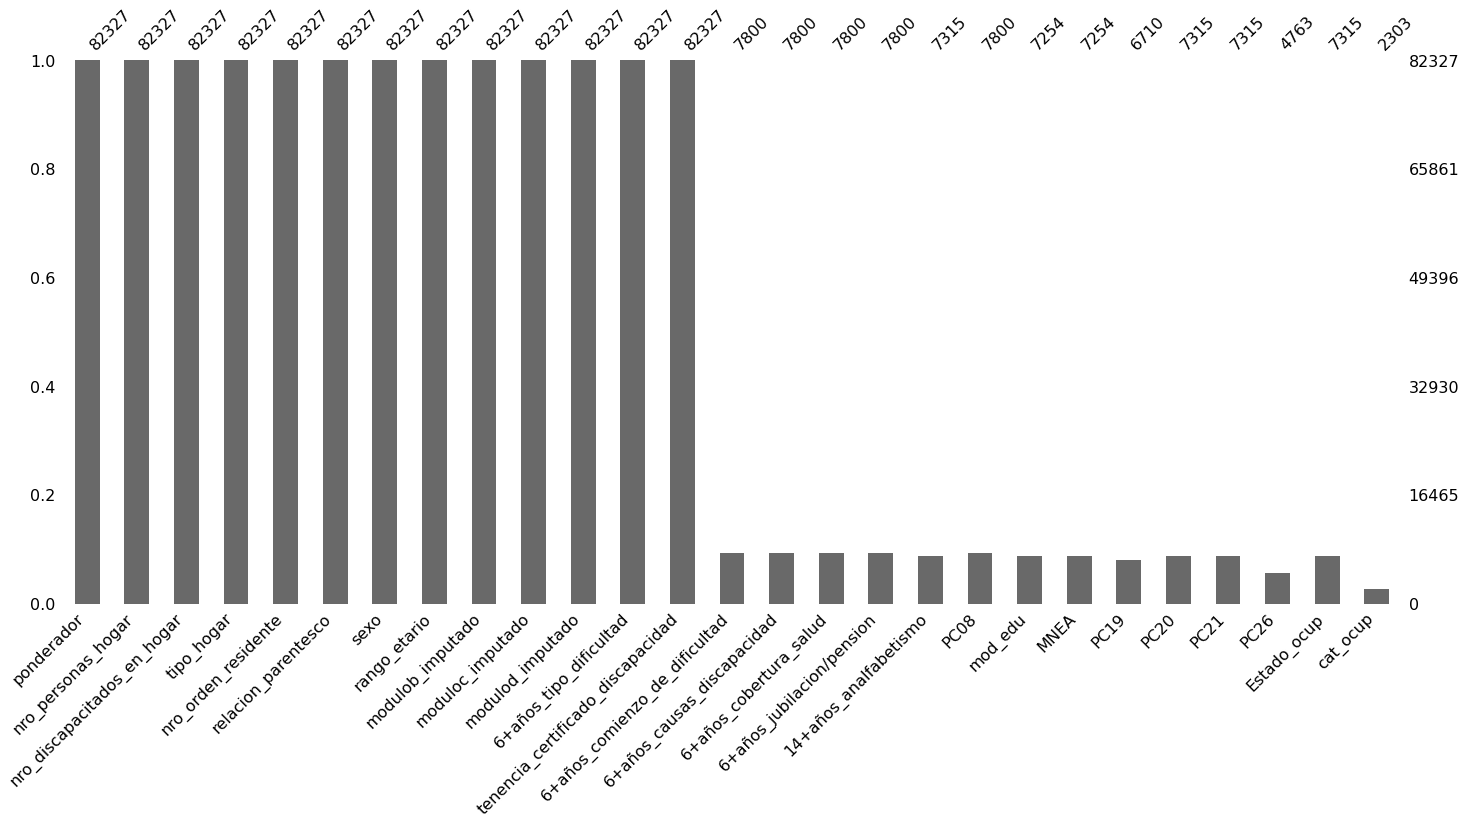

In [62]:
msno.bar(df)

- - -

### XVIII. "PC08" & "MNEA"

Las siguientes columnas vuelven a tomar la subpoblación de personas de 6 años o más.

| "PC08" ("Asiste a Establecimiento Educativo") |
|:---:|
| 1 = Sí, cursa |
| 2 = No está cursando, pero cursó |
| 3 = Nunca cursó |

| "MNEA" ("Máximo Nivel Educativo Alcanzado") |
|:---:|
| 1 = Primario completo |
| 2 = Secundario incompleto |
| 3 = Educación integral |
| 4 = Secundario completo | 
| 5 = Superior no universitario, universitario o posgrado incompleto o completo |
| 6 = Sin especificar / Ignorado |

Procedamos a editarlas para que reflejen la información con más claridad:

In [63]:
df["PC08"] = df["PC08"].replace({
     1: "Está cursando",
     2: "No está cursando, pero cursó",
     3: "Nunca cursó"})

df["MNEA"] = df["MNEA"].replace({
    1: "Primario completo",
    2: "Secundario incompleto",
    3: "Educación integral",
    4: "Secundario completo",
    5: "Superior no universitario, universitario o posgrado incompleto o completo",
    6: "Sin especificar / Ignorado"})

df.rename(columns = {
    "PC08": "6+años_asistencia_educacion",
    "MNEA": "6+años_maxima_educacion_alcanzada"}, inplace = True)

Y ahora veamos los resultados:

In [64]:
print(df["6+años_asistencia_educacion"].value_counts())
print("Total:", df["6+años_asistencia_educacion"].value_counts().sum(), "\n")

print(df["6+años_maxima_educacion_alcanzada"].value_counts())
print("Total:", df["6+años_maxima_educacion_alcanzada"].value_counts().sum())

No está cursando, pero cursó    6164
Está cursando                   1090
Nunca cursó                      546
Name: 6+años_asistencia_educacion, dtype: int64
Total: 7800 

Primario completo                                                            3540
Secundario incompleto                                                        1446
Secundario completo                                                           993
Superior no universitario, universitario o posgrado incompleto o completo     982
Sin especificar / Ignorado                                                    197
Educación integral                                                             96
Name: 6+años_maxima_educacion_alcanzada, dtype: int64
Total: 7254


El caso de estas columnas es bastante particular: si bien las clasificaciones "No está cursando, pero cursó" y "Sí, cursa" de la columna "6+años_asistencia_educacion" engloban el total de observaciones de "6+años_maxima_educacion_alcanzada"...

In [65]:
6164 + 1090

7254

... la realidad es que si combináramos ambas columnas perderíamos información. Una nos indica si la persona está cursando o no, mientras que la otra nos informa sobre el nivel de educación que alcanzó. Así, para este caso es mejor dejarlas tal como están.

- - -

### XIX. "mod_edu" & "6+años_asistencia_educacion"

Vamos a revisar ahora la columna "mod_edu" ("Modalidad educativa de asistencia actual y pasada"), empezando por editarla para un mejor vislumbramiento de datos.

Esta columna también abarca una subpoblación de 6 años o más.

In [66]:
df["mod_edu"] = df["mod_edu"].replace({
    1: "Sólo común",
    2: "Sólo especial",
    3: "Común y especial",
    9: "Ignorado"})

df.rename(columns = {
    "mod_edu": "6+años_modalidad_educativa_actual/pasada"}, inplace = True)

Sería interesante comparar esta columna con "6+años_asistencia_educacion", que nos informaba en líneas generales si la persona cursa estudios o no.

In [67]:
print(df["6+años_asistencia_educacion"].value_counts())
print("Total:", df["6+años_asistencia_educacion"].value_counts().sum(), "\n")

print(df["6+años_modalidad_educativa_actual/pasada"].value_counts())
print("Total:", df["6+años_modalidad_educativa_actual/pasada"].value_counts().sum())

No está cursando, pero cursó    6164
Está cursando                   1090
Nunca cursó                      546
Name: 6+años_asistencia_educacion, dtype: int64
Total: 7800 

Sólo común          6510
Sólo especial        478
Común y especial     186
Ignorado              80
Name: 6+años_modalidad_educativa_actual/pasada, dtype: int64
Total: 7254


Vemos que al igual que en la comparación de columnas anterior, la suma de las clasificaciones "No está cursando, pero cursó" y "Sí, cursa" de la columna "6+años_asistencia_educacion" engloban el total de observaciones de "6+años_modalidad_educativa_actual_y_pasada"...

In [68]:
6164 + 1090

7254

... pero al igual que en el caso anterior, nos conviene no combinar las dos columnas, para así preservar mayor cantidad de información.

- - -

### XX. "PC19" & "6+años_asistencia_educacion"

La columna "PC19" ("Principal motivo de no cursar actualmente/nunca cursó") se caracteriza por tener un elevado número de clasificaciones en el Manual de Uso, todas ellas cubriendo una subpoblación de 6 años o más. Ubiquémoslas en el dataset para ver de cuáles se trata:

In [69]:
df["PC19"] = df["PC19"].replace({
    1: "Problemas de accesibilidad en la vía pública y transportes",
    2: "No consiguió vacante en la escuela pública",
    3: "Ausencia de escuelas especiales donde vive",
    4: "Escuela sin docentes/profesionales/apoyo especializados",
    5: "No accedió a escolaridad debido a su discapacidad",
    6: "No posee suficientes recursos económicos",
    7: "Terminó sus estudios / no quiere seguir estudiando",
    8: "Otro motivo sin especificar"})

df.rename(columns = {
    "PC19": "6+años_principal_motivo_no_cursa/nunca_curso"}, inplace = True)

¿Qué pasa si usamos por tercera vez la columna "6+años_asistencia_educacion" para ver si hay coincidencias en el número de observaciones?

In [70]:
print(df["6+años_asistencia_educacion"].value_counts())
print("Total:", df["6+años_asistencia_educacion"].value_counts().sum(), "\n")

print(df["6+años_principal_motivo_no_cursa/nunca_curso"].value_counts())
print("Total:", df["6+años_principal_motivo_no_cursa/nunca_curso"].value_counts().sum())

No está cursando, pero cursó    6164
Está cursando                   1090
Nunca cursó                      546
Name: 6+años_asistencia_educacion, dtype: int64
Total: 7800 

Terminó sus estudios / no quiere seguir estudiando            2788
Otro motivo sin especificar                                   2171
No posee suficientes recursos económicos                      1191
No accedió a escolaridad debido a su discapacidad              311
Problemas de accesibilidad en la vía pública y transportes     177
Ausencia de escuelas especiales donde vive                      31
Escuela sin docentes/profesionales/apoyo especializados         27
No consiguió vacante en la escuela pública                      14
Name: 6+años_principal_motivo_no_cursa/nunca_curso, dtype: int64
Total: 6710


Si sumamos las observaciones "Nunca cursó" (546) y "No está cursando, pero cursó" (6164) de "6+años_asistencia_educacion" obtenemos:

In [71]:
546 + 6164

6710

Vemos que efectivamente coinciden con el número total de observaciones de "6+años_principal_motivo_no_cursa/nunca_curso", pero al igual que en las dos comparaciones anteriores, de todos modos no integraremos esta última columna a la anterior, con la finalidad de conservar información.

Queda así finalizada esta compleja subsección de columnas relacionadas con el nivel educativo.

- - -

**IMPORTANTE:** A partir de este punto, todas las columnas engloban una **subpoblación de 14 años o más**. Como se irá apreciando a medida que se revise cada columna individual, realmente no tiene ninguna lógica tener en cuenta a aquellos casos por debajo de esa edad.

- - -

### XXI. "PC20" & "PC21"

Ya estamos en la recta final. Ahora es el turno de "PC20" ("Convive en pareja") y "PC21"("Estado civil legal"). "PC20" tiene sólo dos tipos de valor, en relación a si la persona vive en pareja ("1") o no ("2").

Por su parte, "PC21" contiene seis categorías distintas.

Ubiquémoslas.

In [72]:
df["PC20"] = df["PC20"].replace({
    1: "Sí",
    2: "No"})

df["PC21"] = df["PC21"].replace({
    1: "Soltero/a",
    2: "Casado/a",
    3: "Unión civil o convivencial legal",
    4: "Divorciado/a",
    5: "Separado/a legalmente",
    6: "Viudo/a"})

df.rename(columns = {
    "PC20": "14+años_convive_en_pareja",
    "PC21": "14+años_estado_civil_legal"}, inplace = True)

En este caso, veamos si las categorías "Casado/a" y "En unión civil o convivencial legal" de "14+años_estado_civil_legal" se corresponden con la cantidad de "Sí" de "14+años_convive_en_pareja".

In [73]:
print(df["14+años_convive_en_pareja"].value_counts())
print("Total:", df["14+años_convive_en_pareja"].value_counts().sum(), "\n")

print(df["14+años_estado_civil_legal"].value_counts())
print("Total:", df["14+años_estado_civil_legal"].value_counts().sum())

No    4166
Sí    3149
Name: 14+años_convive_en_pareja, dtype: int64
Total: 7315 

Soltero/a                           2663
Casado/a                            2470
Viudo/a                             1313
Divorciado/a                         374
Unión civil o convivencial legal     303
Separado/a legalmente                192
Name: 14+años_estado_civil_legal, dtype: int64
Total: 7315


La suma de "Casado/a" y "En unión civil o convivencial legal" de "14+años_estado_civil_legal" nos da:

In [74]:
2470 + 303

2773

Definitivamente no hay coincidencia. 

Se probaron otras variaciones de sumas entre clasificaciones, y no se obtuvieron valores que encajen. Es evidente que aunque están informando sobre la misma temática (status conyugal de los encuestados), ambas columnas reflejan aspectos diferentes.

Hay varias posibilidades para que los números no sean similares; no necesariamente tiene que tratarse de errores en la toma. Por ejemplo, siendo que "14+años_convive_en_pareja" se refiere, valga la redundancia, a la convivencia en pareja, podría ser que la persona esté en una relación de noviazgo pero que no esté conviviendo con su otro significativo; o bien que ambas personas estén separadas legalmente pero por cuestiones económicas se vean forzadas a seguir conviviendo bajo el mismo techo; o bien que legalmente la persona figure como viudo/a pero que haya encontrado otra pareja y ya esté conviviendo con ella, etc.

En síntesis, ambas columnas ofrecen información separadamente, por lo que se decidió conservarlas a las dos. 

- - -

### XXII. "Estado_ocup" & "cat_ocup"

Pasemos al último grupo por revisar, compuesto por tres columnas.

Comenzaremos por "Estado_ocup" y "cat_ocup", a las cuales les reemplazaremos sus categorías por las del Manual de Uso y les daremos nombres más descriptivos, como siempre.

In [75]:
df["Estado_ocup"] = df["Estado_ocup"].replace(
    {1: "Ocupado",
     2: "Desocupado",
     3: "Inactivo"})

df["cat_ocup"] = df["cat_ocup"].replace(
    {1: "Ocupado - Patrón",
     2: "Ocupado - Cuenta propia",
     3: "Ocupado - Obrero / empleado",
     4: "Ocupado - Trabajador familiar"})

df.rename(columns = {
    "Estado_ocup": "14+años_status_laboral",
    "cat_ocup": "14+años_categoria_laboral"}, inplace = True)

print(df["14+años_status_laboral"].value_counts())
print("Total:", df["14+años_status_laboral"].value_counts().sum(), "\n")

print(df["14+años_categoria_laboral"].value_counts())
print("Total:", df["14+años_categoria_laboral"].value_counts().sum())

Inactivo      4763
Ocupado       2303
Desocupado     249
Name: 14+años_status_laboral, dtype: int64
Total: 7315 

Ocupado - Obrero / empleado      1076
Ocupado - Cuenta propia           988
Ocupado - Trabajador familiar     159
Ocupado - Patrón                   80
Name: 14+años_categoria_laboral, dtype: int64
Total: 2303


Es posible combinar estas columnas, ya que la categoría "Ocupado" de "14+años_status_laboral" engloba el número exacto de observaciones en "14+años_categoria_laboral", que es 2303.

Por tratarse de un procedimiento familiar a esta altura, se sobreentiende que tras combinarlas nos desharemos de "14+años_categoria_laboral", por tratarse de la columna con menor información.

A los fines de ser breves, realizaremos ambos procedimientos en una misma celda.

In [76]:
df["14+años_status_laboral"].mask(df["14+años_status_laboral"] == "Ocupado",\
                                  df["14+años_categoria_laboral"], inplace=True)

df.drop("14+años_categoria_laboral", axis = 1, inplace = True)

print(df["14+años_status_laboral"].value_counts())
print("Total:", df["14+años_status_laboral"].value_counts().sum())

Inactivo                         4763
Ocupado - Obrero / empleado      1076
Ocupado - Cuenta propia           988
Desocupado                        249
Ocupado - Trabajador familiar     159
Ocupado - Patrón                   80
Name: 14+años_status_laboral, dtype: int64
Total: 7315


- - - 

### XXIII. "PC26" y "14+años_status_laboral"

"PC26" ("Motivo principal por el que no buscó trabajo") es la última columna del dataset.

In [77]:
df["PC26"] = df["PC26"].replace(
    {1: "Inactivo - Buscó mucho tiempo y no consiguió / desistió",
     2: "Inactivo - Desconfía de su capacidad de obtener trabajo",
     3: "Inactivo - Problemas de accesibilidad en la vía pública",
     4: "Inactivo - Es estudiante",
     5: "Inactivo - Dedicado al cuidado del hogar",
     6: "Inactivo - No quiere perder pensión por dificultad/invalidez",
     7: "Inactivo - Jubilado / pensionado",
     8: "Inactivo - No quiere / no necesita trabajar",
     9: "Inactivo - Otro motivo sin especificar"})

df.rename(columns = {"PC26": "14+años_motivo_no_busco_trabajo"}, inplace = True)

¿Podría ser integrada a "14+años_status_laboral"? Averigüemos:

In [78]:
print(df["14+años_status_laboral"].value_counts())
print("Total:", df["14+años_status_laboral"].value_counts().sum(), "\n")

print(df["14+años_motivo_no_busco_trabajo"].value_counts())
print("Total:", df["14+años_motivo_no_busco_trabajo"].value_counts().sum())

Inactivo                         4763
Ocupado - Obrero / empleado      1076
Ocupado - Cuenta propia           988
Desocupado                        249
Ocupado - Trabajador familiar     159
Ocupado - Patrón                   80
Name: 14+años_status_laboral, dtype: int64
Total: 7315 

Inactivo - Jubilado / pensionado                                2317
Inactivo - Otro motivo sin especificar                           774
Inactivo - No quiere / no necesita trabajar                      387
Inactivo - Desconfía de su capacidad de obtener trabajo          366
Inactivo - Dedicado al cuidado del hogar                         331
Inactivo - Es estudiante                                         246
Inactivo - No quiere perder pensión por dificultad/invalidez     238
Inactivo - Buscó mucho tiempo y no consiguió / desistió           55
Inactivo - Problemas de accesibilidad en la vía pública           49
Name: 14+años_motivo_no_busco_trabajo, dtype: int64
Total: 4763


¡Enhorabuena! Con 4763 observaciones (similar al número de la categoría "Inactivo" de "14+años_status_laboral") vemos que también pueden combinarse. Hagámoslo y procuremos que sólo quede la columna "14+años_status_laboral".

Este es el resultado:

In [79]:
df["14+años_status_laboral"].mask(df["14+años_status_laboral"] == "Inactivo",\
                                  df["14+años_motivo_no_busco_trabajo"], inplace=True)

df.drop("14+años_motivo_no_busco_trabajo", axis = 1, inplace = True)

print(df["14+años_status_laboral"].value_counts())
print("Total:", df["14+años_status_laboral"].value_counts().sum())

Inactivo - Jubilado / pensionado                                2317
Ocupado - Obrero / empleado                                     1076
Ocupado - Cuenta propia                                          988
Inactivo - Otro motivo sin especificar                           774
Inactivo - No quiere / no necesita trabajar                      387
Inactivo - Desconfía de su capacidad de obtener trabajo          366
Inactivo - Dedicado al cuidado del hogar                         331
Desocupado                                                       249
Inactivo - Es estudiante                                         246
Inactivo - No quiere perder pensión por dificultad/invalidez     238
Ocupado - Trabajador familiar                                    159
Ocupado - Patrón                                                  80
Inactivo - Buscó mucho tiempo y no consiguió / desistió           55
Inactivo - Problemas de accesibilidad en la vía pública           49
Name: 14+años_status_laboral, dtyp

- - -

## 4. Visualizando Dataset Optimizado

Habiendo terminado todos los pasos del proceso de Limpieza de Datos / Data Cleaning, repitamos todos los pasos de la Sección 2 (*Análisis Exploratorio de Datos*), para poder visualizar las diferencias.

Comencemos por *.shape*. El número original de columnas era 35. Logramos acotar el dataset para que queden...

In [80]:
df.shape[1]

25

Veamos cuáles son las columnas que quedaron, y el tipo de información que albergan. Téngase en cuenta que todas aquellas a las que les reemplazamos sus valores numéricos por las categorías del Manual de Uso serán consideradas de tipo "object".

Además, y sólo como curiosidad, la idea original era transformar "14+años_analfabetismo", "14+años_convive_en_pareja" y las tres columnas "modulo_imputado" en *booleanas*. Este tipo de columnas son aquellas de tipo binario, donde o son "False / Falso" o "True / Verdadero", y estas cinco en especial tienen valores "Sí" o "No", por lo cual eran candidatas perfectas. Sin embargo, por poseer valores "NaN" (observaciones vacías), un efecto indeseado era que dichos campos eran también rellenados, por lo que la información quedaba corrompida.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82327 entries, 1 to 82327
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   ponderador                                    82327 non-null  int64 
 1   nro_personas_hogar                            82327 non-null  int64 
 2   nro_discapacitados_en_hogar                   82327 non-null  object
 3   tipo_hogar                                    82327 non-null  object
 4   nro_orden_residente                           82327 non-null  int64 
 5   relacion_parentesco                           82327 non-null  object
 6   sexo                                          82327 non-null  object
 7   rango_etario                                  82327 non-null  object
 8   modulob_imputado                              82327 non-null  object
 9   moduloc_imputado                              82327 non-null  object
 10

Por otra parte, aunque se indicó al final del Análisis Exploratorio que el rellenado de las observaciones vacías quedaba por fuera de los objetivos de esta Notebook, aún así podemos apreciar un avance importante en este sentido, ya que al haber combinado muchas columnas ahora hay una mayor cantidad de ellas que están completas.

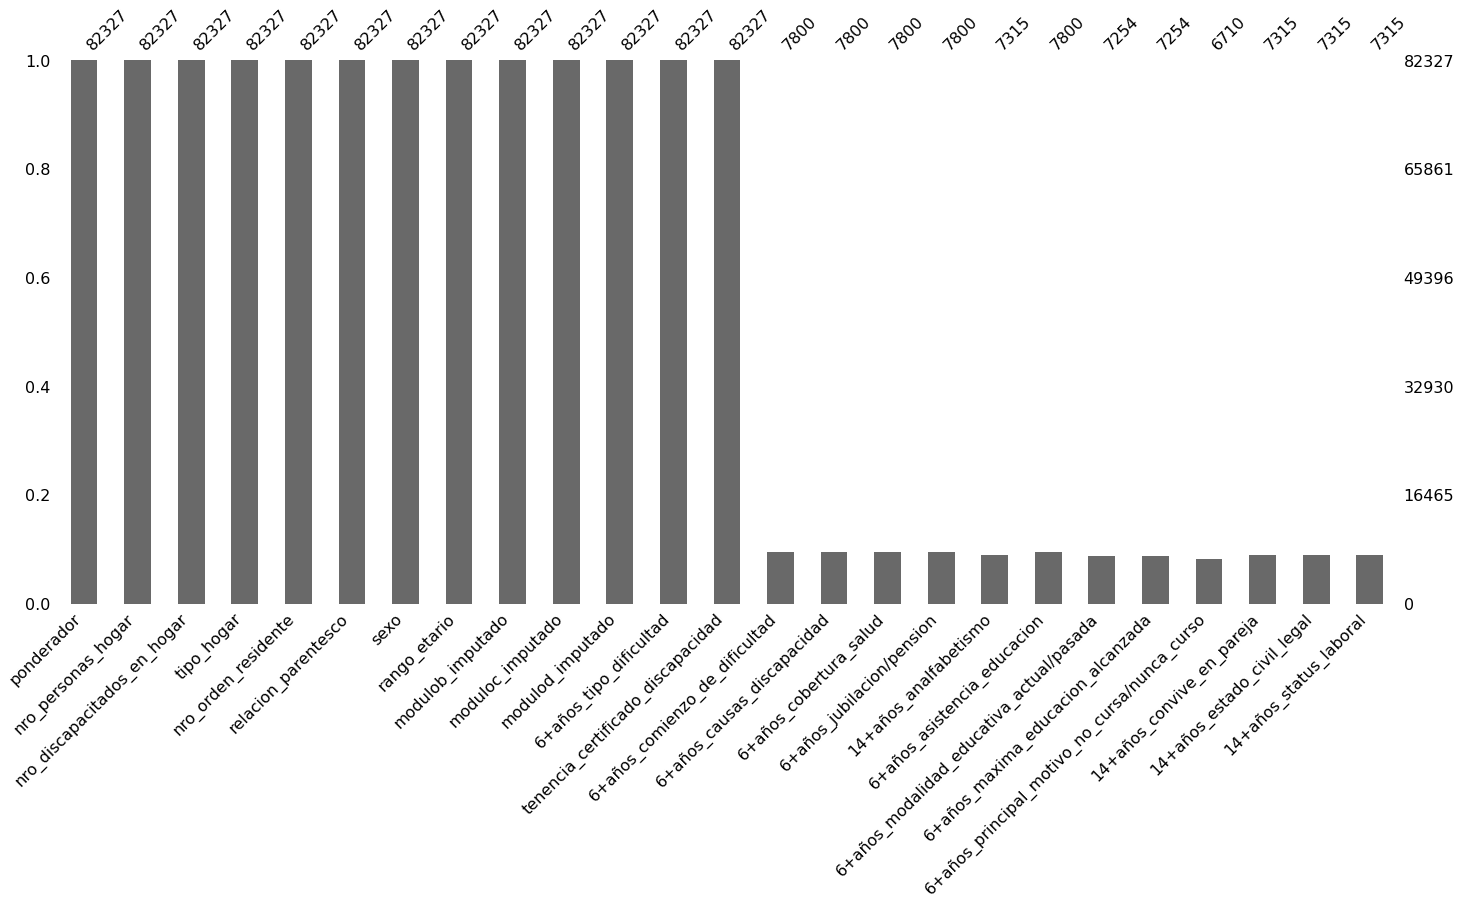

In [82]:
msno.bar(df)

Finalmente, visualicemos como muestra las 15 primeras columnas del dataset, para ver cómo afectaron los cambios a cada observación.

Podrá notarse que, a pesar de que los nombres más largos de las nuevas columnas hacen al dataset más ancho, aún así por ser más descriptivos ahora podemos entender mejor qué nos están informando:

In [83]:
df.iloc[:15, :8]

,ponderador,nro_personas_hogar,nro_discapacitados_en_hogar,tipo_hogar,nro_orden_residente,relacion_parentesco,sexo,rango_etario
ID,,,,,,,,
1,413,4,Sin discapacitados,Familiar - Nuclear,1,Jefe,Varón,14-39 años
2,473,5,Sin discapacitados,Familiar - Nuclear,3,Hijo/hijastro,Varón,14-39 años
3,473,5,Sin discapacitados,Familiar - Nuclear,4,Hijo/hijastro,Varón,14-39 años
4,473,5,Sin discapacitados,Familiar - Nuclear,5,Hijo/hijastro,Varón,6-13 años
5,409,3,Un discapacitado,Familiar - Extendido,1,Jefe,Mujer,40-64 años
6,409,3,Un discapacitado,Familiar - Extendido,2,Progenitor/suegro,Mujer,65+ años
7,409,3,Un discapacitado,Familiar - Extendido,3,Otros (familiares/no familiares),Mujer,14-39 años
8,394,2,Sin discapacitados,Familiar - Nuclear,1,Jefe,Varón,65+ años
9,394,2,Sin discapacitados,Familiar - Nuclear,2,Pareja/cónyuge,Mujer,65+ años


In [84]:
df.iloc[:15, 8:14]

,modulob_imputado,moduloc_imputado,modulod_imputado,6+años_tipo_dificultad,tenencia_certificado_discapacidad,6+años_comienzo_de_dificultad
ID,,,,,,
1,No,No,No,Sin dificultades,No,NaN
2,Sí,No,No,Sin dificultades,No,NaN
3,Sí,No,No,Sin dificultades,No,NaN
4,Sí,No,No,Sin dificultades,No,NaN
5,No,No,No,Sin dificultades,No,NaN
6,No,No,No,Una dificultad - Motora,No,40-64 años
7,No,No,No,Sin dificultades,No,NaN
8,No,No,No,Sin dificultades,No,NaN
9,No,No,No,Sin dificultades,No,NaN


In [85]:
df.iloc[:15, 14:19]

,6+años_causas_discapacidad,6+años_cobertura_salud,6+años_jubilacion/pension,14+años_analfabetismo,6+años_asistencia_educacion
ID,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,Enfermedad/síndrome,Obra social / PAMI,Sólo jubilación,No,"No está cursando, pero cursó"
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [86]:
df.iloc[:15, 19:22]

,6+años_modalidad_educativa_actual/pasada,6+años_maxima_educacion_alcanzada,6+años_principal_motivo_no_cursa/nunca_curso
ID,,,
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,Sólo común,Primario completo,Terminó sus estudios / no quiere seguir estudi...
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [87]:
df.iloc[:15, 22:]

,14+años_convive_en_pareja,14+años_estado_civil_legal,14+años_status_laboral
ID,,,
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,No,Soltero/a,Inactivo - Jubilado / pensionado
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


- - -

## 5. Guardando los cambios

Como broche final, guardemos este dataset mejorado en un nuevo archivo CSV.

In [88]:
df.to_csv("estudio_discapacidad_2018_mejorado.csv", encoding = "utf-8")